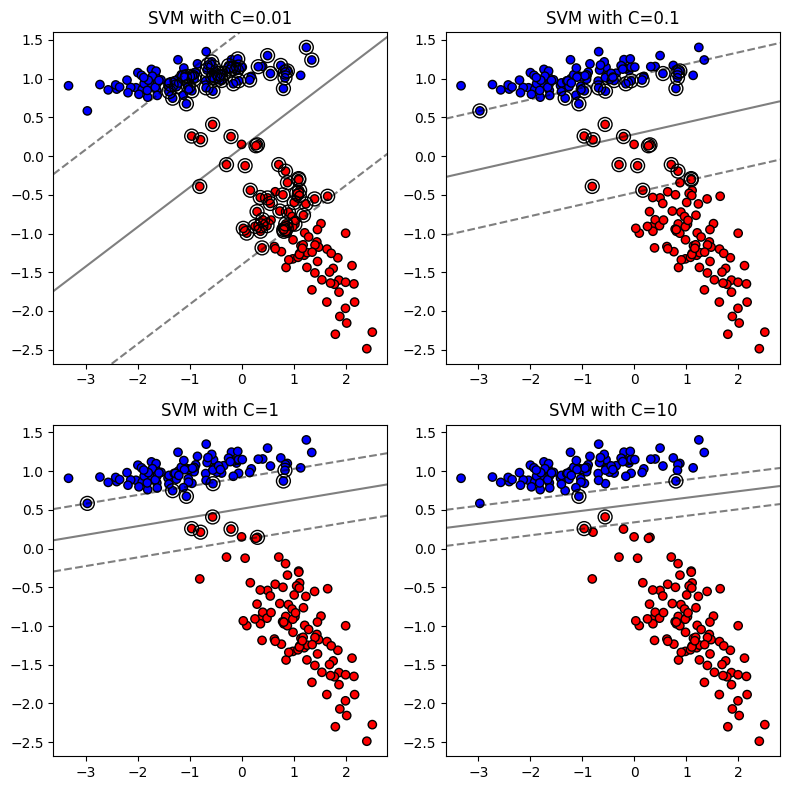

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

# 生成一些樣本
X, y = datasets.make_classification(n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1, n_samples=200, random_state=1000)
#n_features 必須大於等於 n_informative + n_redundant。
#當 n_clusters_per_class=1 時，生成的數據對於每個類別來說會在一個緊密集中的區域內，這使得數據更容易線性可分。
#當 n_clusters_per_class=2 或更高時，每個類別的數據會在多個簇中分佈，這通常會使數據更加複雜且可能不可線性分離。
# 多個簇會導致數據點的分佈更分散，增加了類別之間的重疊，從而使得分類問題更加困難。
y = np.where(y == 0, -1, 1)  # 轉換標籤為-1和1

# 切分訓練和測試
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1000)

# 設定不同的C值
C_values = [0.01, 0.1, 1, 10]
models = []

# 訓練SVM模型
for C in C_values:
    model = SVC(kernel='linear', C=C)
    model.fit(X_train, y_train)
    models.append(model)

# 繪製決策邊界
plt.figure(figsize=(8, 8))

for i, model in enumerate(models):
    plt.subplot(2, 2, i + 1)
    plt.title(f'SVM with C={C_values[i]}')

    # 繪製數據點
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=ListedColormap(['blue', 'red']), edgecolors='k')

    # 繪製決策邊界
    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # 建立網格來評估模型
    xx = np.linspace(xlim[0], xlim[1], 30)
    yy = np.linspace(ylim[0], ylim[1], 30)
    YY, XX = np.meshgrid(yy, xx)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T
    Z = model.decision_function(xy).reshape(XX.shape)

    # 繪製決策邊界和間隔
    ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])

    # 突出顯示支持向量
    ax.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], s=100, linewidth=1, facecolors='none', edgecolors='k')

plt.tight_layout()
plt.show()


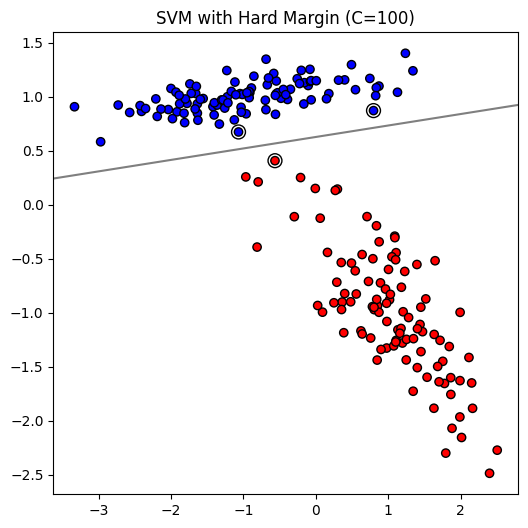

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

# 生成一些样本
X, y = datasets.make_classification(n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1, n_samples=200, random_state=1000)
y = np.where(y == 0, -1, 1)  # 转换标签为-1和1

# 切分训练和测试数据
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1000)

# 设置C值为一个非常大的数来实现硬边界
C_value = 100
model = SVC(kernel='linear', C=C_value)
model.fit(X_train, y_train)

# 绘制决策边界
plt.figure(figsize=(6, 6))
plt.title(f'SVM with Hard Margin (C={C_value})')

# 绘制数据点
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=ListedColormap(['blue', 'red']), edgecolors='k')

# 绘制决策边界
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# 创建网格来评估模型
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = model.decision_function(xy).reshape(XX.shape)

# 绘制决策边界和间隔
ax.contour(XX, YY, Z, colors='k', levels=[0], alpha=0.5, linestyles=['-'])  # 仅绘制决策边界

# 突出显示支持向量
ax.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], s=100, linewidth=1, facecolors='none', edgecolors='k')

plt.show()


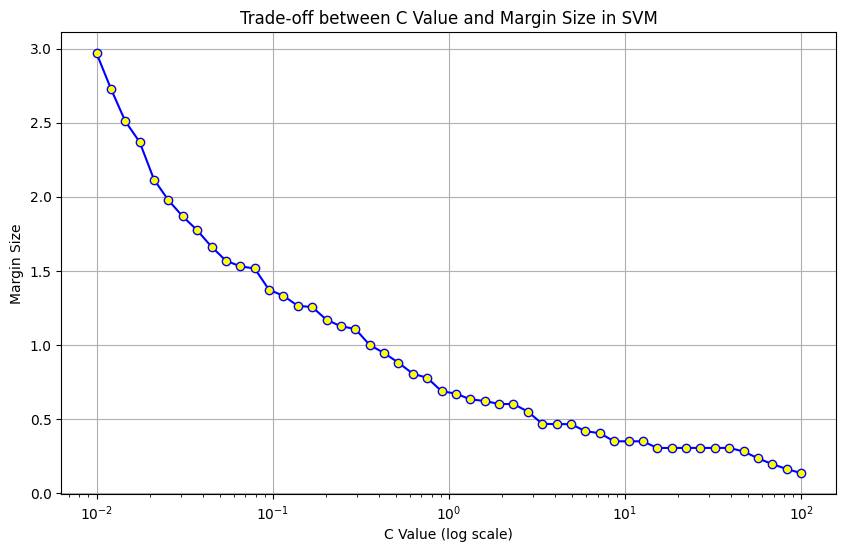

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

# 生成示例數據
X, y = datasets.make_classification(n_samples=100, n_features=2, n_informative=2, n_redundant=0, random_state=42)
scaler = StandardScaler()
X = scaler.fit_transform(X)

# 訓練不同C值的SVM模型並計算margin
C_values = np.logspace(-2, 2, 50)  # 生成從0.01到100之間的50個C值
margins = []

for C in C_values:
    model = SVC(kernel='linear', C=C).fit(X, y)
    # margin 是 2 / ||w||，w 是決策邊界的法向量
    w = model.coef_[0]
    margin = 2 / np.sqrt(np.sum(w ** 2))
    margins.append(margin)

# 繪製C值與margin之間的關係圖
plt.figure(figsize=(10, 6))
plt.plot(C_values, margins, marker='o',color='blue', markerfacecolor='yellow')
plt.xscale('log')
plt.xlabel('C Value (log scale)')
plt.ylabel('Margin Size')
plt.title('Trade-off between C Value and Margin Size in SVM')
plt.grid(True)
plt.show()


In [4]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
nb_samples = 500
X, Y = make_classification(n_samples=nb_samples, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25)


In [5]:
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
svc = SVC(kernel='linear')
cross_val_score(svc, X, Y, scoring='accuracy', cv=10).mean()


0.866

In [6]:
svc.fit(X_train, Y_train)
svc.score(X_test, Y_test)




0.904

In [7]:
svc = SVC(C=0.01, kernel='linear')
svc.fit(X_train, Y_train)
svc.score(X_test, Y_test)


0.896

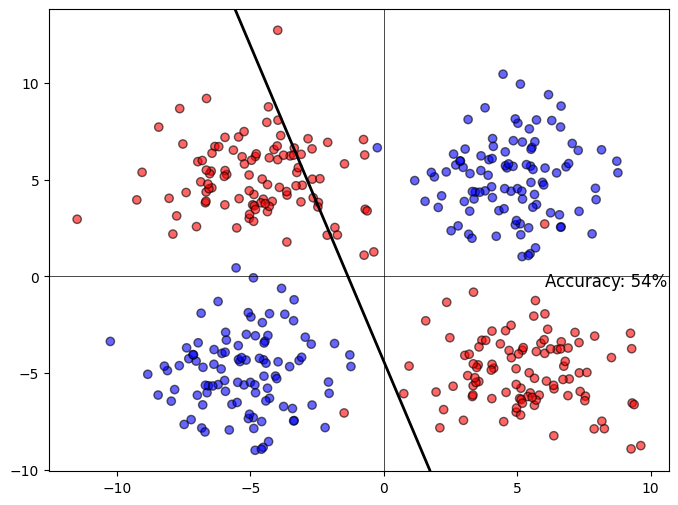

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.svm import SVC
from matplotlib.colors import ListedColormap

# 生成非線性可分的數據
X1, y1 = make_blobs(n_samples=200, centers=[[5, 5], [-5, 5]], cluster_std=2.0, random_state=42)
X2, y2 = make_blobs(n_samples=200, centers=[[-5, -5], [5, -5]], cluster_std=2.0, random_state=42)

# 合併數據集
X = np.vstack((X1, X2))
y = np.hstack((y1, y2))

# 訓練線性分類器
clf = SVC(kernel='linear')
clf.fit(X, y)

# 繪製數據點
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=ListedColormap(['blue', 'red']), edgecolors='k', alpha=0.6)

# 繪製決策邊界
xlim = plt.xlim()
ylim = plt.ylim()

xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 30), np.linspace(ylim[0], ylim[1], 30))
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contour(xx, yy, Z, levels=[0], linewidths=2, colors='black')

# 添加垂直和水平線
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)

# 添加準確率文本
accuracy = clf.score(X, y) * 100
plt.text(xlim[0] + (xlim[1] - xlim[0]) * 0.8, ylim[0] + (ylim[1] - ylim[0]) * 0.4, f'Accuracy: {accuracy:.0f}%', fontsize=12)

# 設置軸限
plt.xlim(xlim)
plt.ylim(ylim)

plt.show()

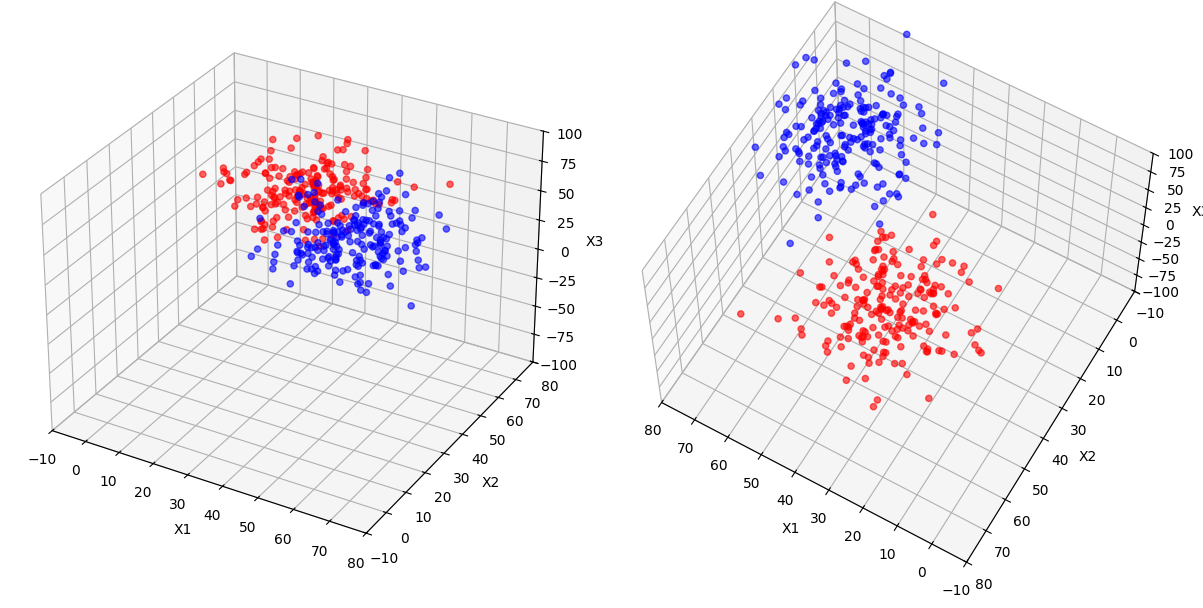

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.datasets import make_blobs
from sklearn.svm import SVC
from matplotlib.colors import ListedColormap

# Generate non-linearly separable 3D data
centers = [[20, 20, 20], [50, 50, 50]]
cluster_std = 10.0
X, y = make_blobs(n_samples=400, centers=centers, cluster_std=cluster_std, random_state=42)

# Swap the first and fourth quadrant data in a 3D sense
X[:, 0] = 80 - X[:, 0]
X[:, 2] = 100 - X[:, 2]

# Train a non-linear classifier using RBF kernel
clf = SVC(kernel='rbf')
clf.fit(X, y)

# Create a figure with two subplots
fig = plt.figure(figsize=(15, 10))

# First subplot
ax1 = fig.add_subplot(121, projection='3d')
cmap = ListedColormap(['blue', 'red'])
ax1.scatter(X[:, 0], X[:, 1], X[:, 2], c=y, cmap=cmap, alpha=0.6)
ax1.set_xlabel('X1')
ax1.set_ylabel('X2')
ax1.set_zlabel('X3')
ax1.set_xlim([-10, 80])
ax1.set_ylim([-10, 80])
ax1.set_zlim([-100, 100])


# Second subplot
ax2 = fig.add_subplot(122, projection='3d')
ax2.scatter(X[:, 0], X[:, 1], X[:, 2], c=y, cmap=cmap, alpha=0.6)
ax2.set_xlabel('X1')
ax2.set_ylabel('X2')
ax2.set_zlabel('X3')
ax2.set_xlim([-10, 80])
ax2.set_ylim([-10, 80])
ax2.set_zlim([-100, 100])
ax2.view_init(elev=60, azim=120)  # Second view angle

# Adjust the space between subplots
plt.subplots_adjust(wspace=0.08)  # Reduce the width space between subplots


plt.show()

In [10]:
# import numpy as np
# import matplotlib.pyplot as plt
# from mpl_toolkits.mplot3d import Axes3D
# from sklearn.datasets import make_blobs
# from sklearn.svm import SVC
# from matplotlib.colors import ListedColormap

# # Generate non-linearly separable 3D data
# centers = [[20, 20, 20], [50, 50, 50]]
# cluster_std = 10.0
# X, y = make_blobs(n_samples=400, centers=centers, cluster_std=cluster_std, random_state=42)

# # Swap the first and fourth quadrant data in a 3D sense
# X[:, 0] = 80 - X[:, 0]
# X[:, 2] = 100 - X[:, 2]

# # Train a non-linear classifier using RBF kernel
# clf = SVC(kernel='rbf')
# clf.fit(X, y)

# # Create a figure with two subplots
# fig = plt.figure(figsize=(15, 10))

# # First subplot
# ax1 = fig.add_subplot(121, projection='3d')
# cmap = ListedColormap(['blue', 'red'])
# ax1.scatter(X[:, 0], X[:, 1], X[:, 2], c=y, cmap=cmap, alpha=0.6)
# ax1.set_xlabel('X1')
# ax1.set_ylabel('X2')
# ax1.set_zlabel('X3')
# ax1.set_xlim([-10, 80])
# ax1.set_ylim([-10, 80])
# ax1.set_zlim([-100, 100])

# # Second subplot
# ax2 = fig.add_subplot(122, projection='3d')
# ax2.scatter(X[:, 0], X[:, 1], X[:, 2], c=y, cmap=cmap, alpha=0.6)
# ax2.set_xlabel('X1')
# ax2.set_ylabel('X2')
# ax2.set_zlabel('X3')
# ax2.set_xlim([-10, 80])
# ax2.set_ylim([-10, 80])
# ax2.set_zlim([-100, 100])
# ax2.view_init(elev=60, azim=120)  # Second view angle

# # Create a mesh grid for plotting the decision boundary
# xx, yy = np.meshgrid(np.linspace(-10, 80, 50), np.linspace(-10, 80, 50))
# zz = np.linspace(-100, 100, 50)
# XX, YY, ZZ = np.meshgrid(xx, yy, zz)

# # Predict the decision function for each point in the mesh grid
# decision_function = clf.decision_function(np.c_[XX.ravel(), YY.ravel(), ZZ.ravel()])
# decision_function = decision_function.reshape(XX.shape)

# # Plot the decision boundary
# ax2.contour3D(XX, YY, ZZ, decision_function, levels=[0], colors='green', linewidths=2, linestyles='solid')

# # Adjust the space between subplots
# plt.subplots_adjust(wspace=0.08)  # Reduce the width space between subplots

# plt.show()

In [11]:
import pandas as pd
from sklearn import datasets

# 載入 Iris 資料集
iris = datasets.load_iris()

# 將資料轉換成 DataFrame
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['target'] = iris.target

# 顯示前三筆完整數據
print(df.head(3))
feature_names = iris.feature_names
# 類別名稱
target_names = iris.target_names

print("特徵名稱：", feature_names)
print("類別名稱：", target_names)




   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   

   target  
0       0  
1       0  
2       0  
特徵名稱： ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
類別名稱： ['setosa' 'versicolor' 'virginica']


In [12]:
# 劃分特徵變數和目標變數
X = df.drop(columns=['target'])
y = df['target']

# 劃分訓練集和測試集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 標準化特徵
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [13]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# 訓練 SVM 模型（線性核）
linear_svc = SVC(kernel='linear', probability=True, random_state=42)
linear_svc.fit(X_train, y_train)

# 使用線性核模型進行預測
y_pred_linear = linear_svc.predict(X_test)
y_prob_linear = linear_svc.predict_proba(X_test)

# 輸出線性核模型的預測結果及其概率
print("線性核模型預測結果：", y_pred_linear[:5])
print("線性核模型預測概率：", y_prob_linear[:5])
print("線性核模型的準確率：", accuracy_score(y_test, y_pred_linear))

線性核模型預測結果： [1 0 2 1 1]
線性核模型預測概率： [[6.79644991e-03 9.61082817e-01 3.21207333e-02]
 [9.50609432e-01 3.55252962e-02 1.38652722e-02]
 [1.02586211e-03 9.78601642e-06 9.98964352e-01]
 [7.73836392e-03 9.06694005e-01 8.55676309e-02]
 [5.71999534e-03 8.85556791e-01 1.08723214e-01]]
線性核模型的準確率： 0.9666666666666667


In [14]:
# 訓練 SVM 模型（非線性核，例如 RBF）
rbf_svc = SVC(kernel='rbf', probability=True, random_state=42)
rbf_svc.fit(X_train, y_train)

# 使用非線性核模型進行預測
y_pred_rbf = rbf_svc.predict(X_test)
y_prob_rbf = rbf_svc.predict_proba(X_test)

# 輸出非線性核模型的預測結果及其概率
print("非線性核模型預測結果：", y_pred_rbf[:5])
print("非線性核模型預測概率：", y_prob_rbf[:5])
print("非線性核模型的準確率：", accuracy_score(y_test, y_pred_rbf))

非線性核模型預測結果： [1 0 2 1 1]
非線性核模型預測概率： [[0.0089919  0.96704812 0.02395998]
 [0.96099101 0.02438555 0.01462345]
 [0.03861396 0.02259615 0.93878988]
 [0.00745659 0.9164228  0.07612061]
 [0.0172125  0.81197439 0.1708131 ]]
非線性核模型的準確率： 1.0


In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# 載入 Iris 資料集
iris = datasets.load_iris()

# 將資料轉換成 DataFrame
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['target'] = iris.target

# # 顯示前三筆完整數據
# print(df.head(3))
feature_names = iris.feature_names
# 類別名稱
target_names = iris.target_names

print("特徵名稱：", feature_names)
print("類別名稱：", target_names)

# 劃分特徵變數和目標變數
X = df.drop(columns=['target'])
y = df['target']

# 劃分訓練集和測試集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 標準化特徵
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 使用 PCA 將數據降維到二維
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# 訓練 SVM 模型（線性核）
linear_svc = SVC(kernel='linear', probability=True, random_state=42)
linear_svc.fit(X_train_pca, y_train)

# 使用線性核模型進行預測
y_pred_linear = linear_svc.predict(X_test_pca)
y_prob_linear = linear_svc.predict_proba(X_test_pca)

# 輸出線性核模型的預測結果及其概率

print("線性核模型的準確率：", accuracy_score(y_test, y_pred_linear))

# 訓練 SVM 模型（非線性核，例如 RBF）
rbf_svc = SVC(kernel='rbf', probability=True, random_state=42)
rbf_svc.fit(X_train_pca, y_train)

# 使用非線性核模型進行預測
y_pred_rbf = rbf_svc.predict(X_test_pca)
y_prob_rbf = rbf_svc.predict_proba(X_test_pca)

# 輸出非線性核模型的預測結果及其概率

print("非線性核模型的準確率：", accuracy_score(y_test, y_pred_rbf))

特徵名稱： ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
類別名稱： ['setosa' 'versicolor' 'virginica']
線性核模型的準確率： 0.9
非線性核模型的準確率： 0.9


C:\Users\617816\AppData\Local\Temp\1\ipykernel_17332\2448132357.py:21: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  scatter_test = ax.scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=y_test, cmap=plt.cm.coolwarm, edgecolor='k', marker='x', label='Test')
C:\Users\617816\AppData\Local\Temp\1\ipykernel_17332\2448132357.py:21: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  scatter_test = ax.scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=y_test, cmap=plt.cm.coolwarm, edgecolor='k', marker='x', label='Test')


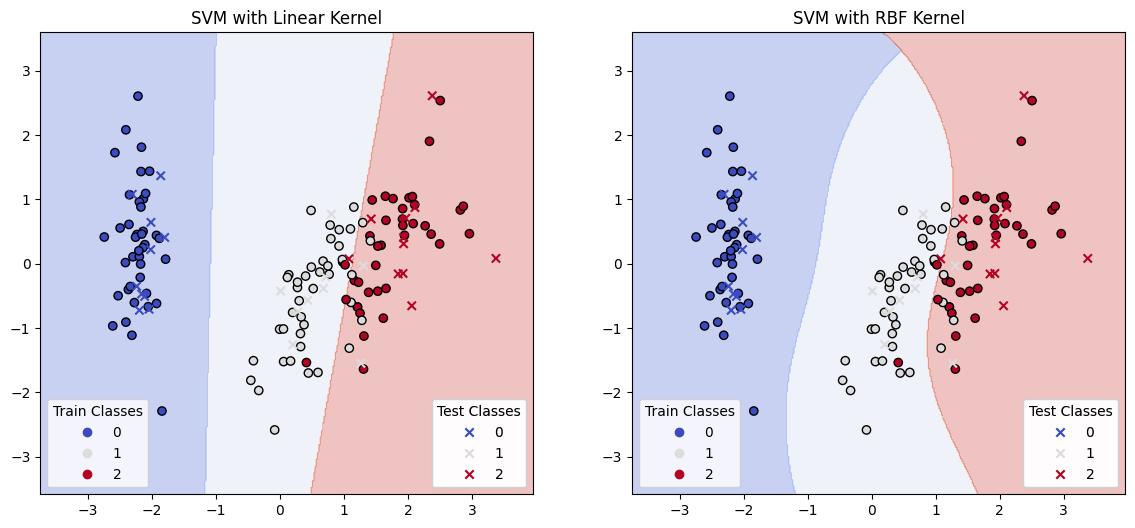

In [16]:

# 創建網格來評估模型
h = .02  # 步長
x_min, x_max = X_train_pca[:, 0].min() - 1, X_train_pca[:, 0].max() + 1
y_min, y_max = X_train_pca[:, 1].min() - 1, X_train_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# 繪製決策邊界和數據點
def plot_decision_boundary(model, ax, title, X_train_pca, y_train, X_test_pca, y_test):
    # 預測網格中的每一點
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # 繪製決策邊界
    ax.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)

    # 繪製訓練數據點
    scatter_train = ax.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, cmap=plt.cm.coolwarm, edgecolor='k', marker='o', label='Train')

    # 繪製測試數據點
    scatter_test = ax.scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=y_test, cmap=plt.cm.coolwarm, edgecolor='k', marker='x', label='Test')

    # 添加圖例
    legend1 = ax.legend(*scatter_train.legend_elements(), title="Train Classes", loc='lower left')
    legend2 = ax.legend(*scatter_test.legend_elements(), title="Test Classes", loc='lower right')
    ax.add_artist(legend1)
    ax.add_artist(legend2)

    # 設置圖形範圍和標題
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_title(title)

# 繪製圖形
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

plot_decision_boundary(linear_svc, ax1, 'SVM with Linear Kernel', X_train_pca, y_train, X_test_pca, y_test)
plot_decision_boundary(rbf_svc, ax2, 'SVM with RBF Kernel', X_train_pca, y_train, X_test_pca, y_test)

plt.show()


xx = np.array([[1, 2, 3], [1, 2, 3], [1, 2, 3]])
yy = np.array([[1, 1, 1], [2, 2, 2], [3, 3, 3]])
xx.ravel()  # 結果: array([1, 2, 3, 1, 2, 3, 1, 2, 3])
yy.ravel()  # 結果: array([1, 1, 1, 2, 2, 2, 3, 3, 3])

np.c_[xx.ravel(), yy.ravel()]
# 結果: array([[1, 1],
#              [2, 1],
#              [3, 1],
#              [1, 2],
#              [2, 2],
#              [3, 2],
#              [1, 3],
#              [2, 3],
#              [3, 3]])

Z = model.predict(np.array([[1, 1], [2, 1], [3, 1], [1, 2], [2, 2], [3, 2], [1, 3], [2, 3], [3, 3]]))
# 假設結果: array([0, 0, 1, 0, 1, 1, 1, 1, 1])

Z = Z.reshape(xx.shape)
# 結果: array([[0, 0, 1],
#              [0, 1, 1],
#              [1, 1, 1]])